Given a $m \times n$ $\textit{grid}$ filled with non-negative numbers, find a path from top left to bottom right, which minimizes the sum of all numbers along its path.

**Note:** You can only move either down or right at any point in time.


*Example 1*

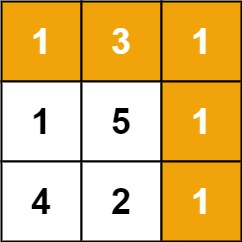
$\textit{grid}$ = [[1,3,1],[1,5,1],[4,2,1]]<br />
Returns 7<br />
Explanation: Because the path 1 → 3 → 1 → 1 → 1 minimizes the sum.

*Example 2*

$\textit{grid}$ = [[1,2,3],[4,5,6]]<br />
Returns 12


*Code*

In [22]:
class Solution:
    def minPathSum(self, grid):
        for row in range(len(grid)):
            for col in range(len(grid[0])):
                if row == 0 and col == 0:
                    continue
                left = grid[row][col-1] if col > 0 else float('inf')
                above = grid[row-1][col] if row > 0 else float('inf')
                grid[row][col] += min(left, above)
        return grid[-1][-1]

In [24]:
print(Solution().minPathSum([[1,3,1],[1,5,1],[4,2,1]]))

7


In [25]:
print(Solution().minPathSum([[1,2,3],[4,5,6]]))

12


In [26]:
print(Solution().minPathSum([[10,5,3],[2,100,4],[100,3,1]]))

23


*Explanation*

For example, we have a grid:
```
  10 |  5  |  3
-----|-----|-----
  2  | 100 |  4
-----|-----|-----
 100 |  3  |  1
```

The minimal cost of every step on a path is the minimum between *left cell value* or *above cell value*. And for every next cell on a path cost of every previous cell have to be included.

For the first row:
```
  10 |  5  |  3
        |
        v
  10 |  15 |  18        
  
Keep 10 because there are no cells on a left or above the left top cell.
5 + 10 = 15 -- there is no any cell above.
3 + 15 = 18 -- there is no any cell above.
```
And now the grid looks as shown below:
```
  10 |  15 |  18
-----|-----|-----
  2  | 100 |  4
-----|-----|-----
 100 |  3  |  1
```

For the second row:
```
  2  | 100 |  4
        |
        v
  12 | 112 |  22

2 + 10 (because there is no cell on a left) = 12
100 + min(left cell value or top cell value) = 100 + min(12 or 15) = 112
4 + min(112 or 18) = 22
```
Updated grid:
```
  10 |  15 |  18
-----|-----|-----
  12 | 112 |  22
-----|-----|-----
 100 |  3  |  1
```

And the last row:
```
 100 |  3  |  1
        |
        v
 112 | 115 |  23

100 + 12 (because there is no cell on a left) = 112
3 + min(112 or 112) = 115
1 + min(115 or 22) = 23
```

The final grid:
```
  10 |  15 |  18
-----|-----|-----
  12 | 112 |  22
-----|-----|-----
 112 | 115 |  23
```

The minimum path sum is in the right bottom cell.